In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re             # regular expression library
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import timeit


In [181]:
# Read datasets/papers.csv into papers
papers = pd.read_csv('nips-papers/papers.csv')


In [182]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [183]:
papers.tail()

,id,year,title,event_type,pdf_name,abstract,paper_text
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...
7240,999,1994,Correlation and Interpolation Networks for Rea...,NaN,999-correlation-and-interpolation-networks-for...,Abstract Missing,Correlation and Interpolation Networks for\nRe...


In [184]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
id            7241 non-null int64
year          7241 non-null int64
title         7241 non-null object
event_type    2422 non-null object
pdf_name      7241 non-null object
abstract      7241 non-null object
paper_text    7241 non-null object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [185]:
drop_cols = ['id', 'event_type', 'pdf_name', ]
papers.drop(columns=drop_cols, axis=1, inplace=True)

In [186]:
# Group the papers by year
groups = papers.groupby(['year'])

# Determine the size of each group
counts = groups.size()

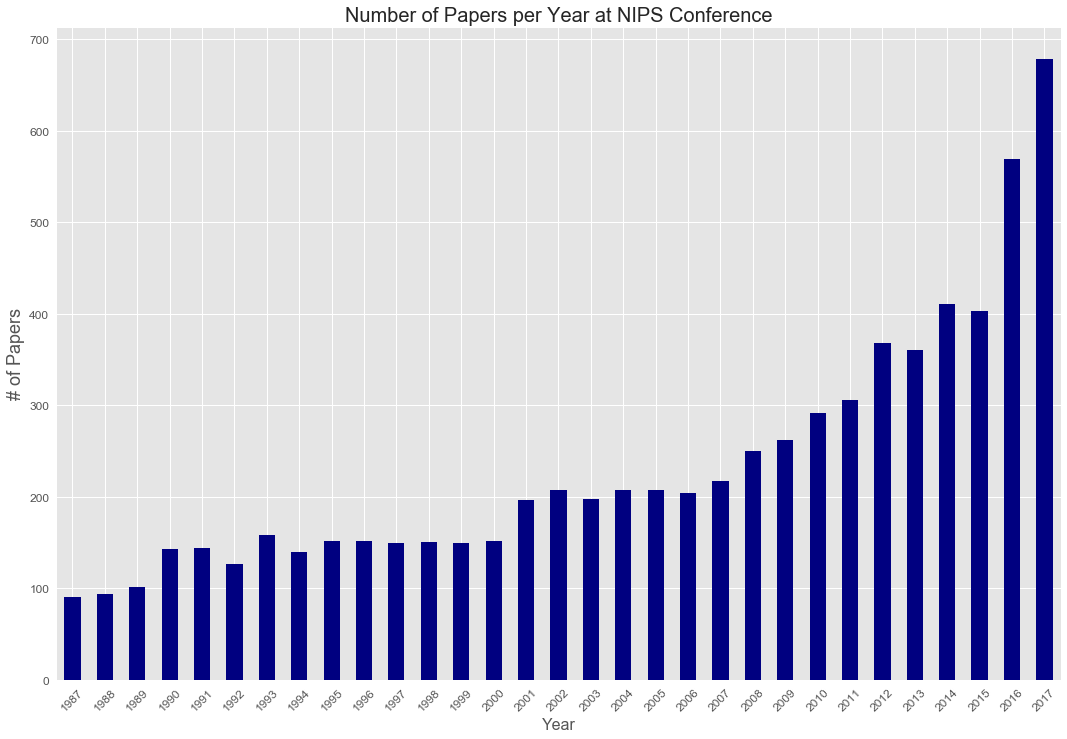

In [187]:
# Group the papers by year
groups = papers.groupby(['year'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
ax = counts.plot(kind='bar', figsize=(18,12), rot=45, fontsize=12, colormap='jet')

ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# of Papers",fontsize=18)
ax.set_title("Number of Papers per Year at NIPS Conference", fontsize=20)
plt.savefig('images/papers_year_bar')

# savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

Build a wordcloud of the titles

In [188]:
# Preprocess text
# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
papers['title_processed'][0:10]

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
5    using a neural net to instantiate a deformable...
6             plasticity-mediated competitive learning
7    iceg morphology classification using an analog...
8    real-time control of a tokamak plasma using ne...
9    pulsestream synapses with non-volatile analogu...
Name: title_processed, dtype: object

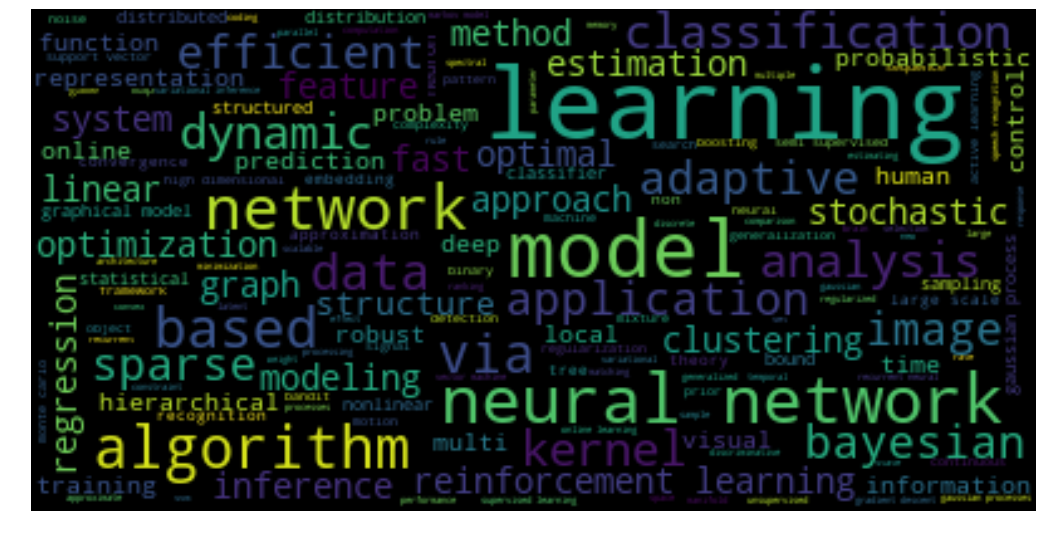

In [197]:
# For wordcloud
# Join the different processed titles together.
long_string = ' '.join(papers.title_processed)

# Create a WordCloud object
wordcloud = WordCloud()

# # Generate a word cloud
#wordcloud.generate(long_string)

# # Visualize the word cloud
# wordcloud.to_image()

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(long_string)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('images/word_cloud_titles')
#wordcloud.to_file("images/word_cloud_titles")
plt.show()

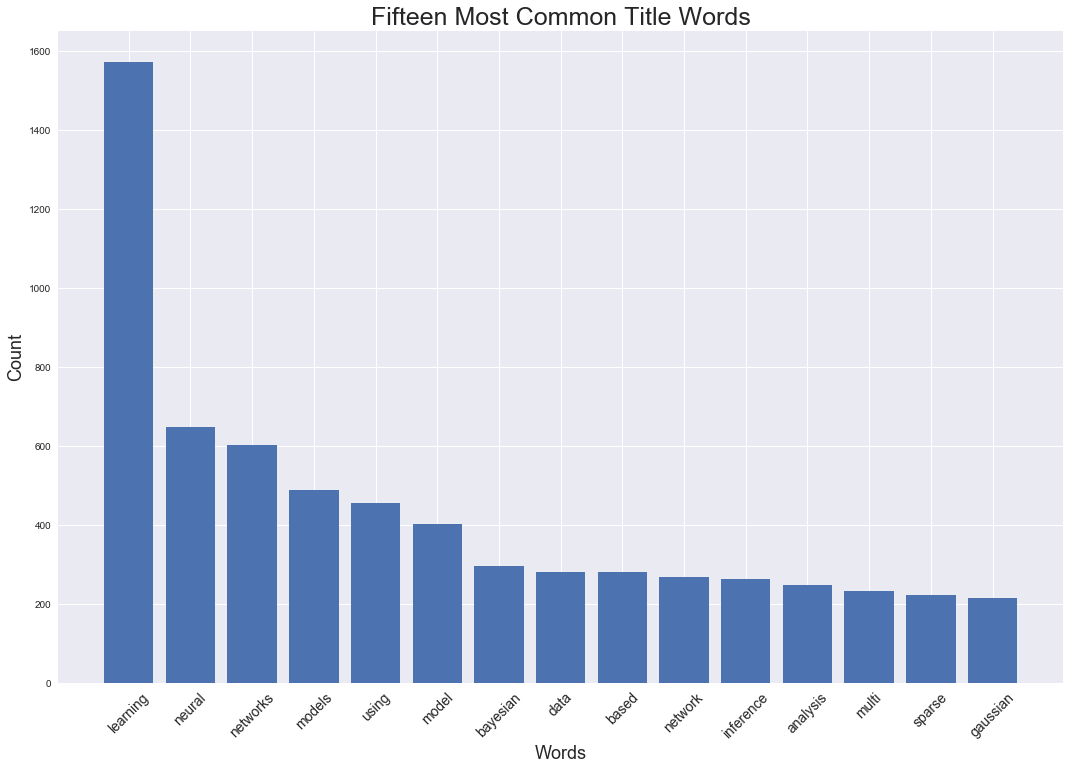

In [198]:
# Working with Titles
# function to print 10 most common words
#plt.style.use('ggplot')
plt.style.use('seaborn')
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(figsize=(18,12))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=45, fontsize=14) 
    plt.xlabel('Words',fontsize=18)
    plt.ylabel('Count',fontsize=18)
    plt.title('Fifteen Most Common Title Words', fontsize=25)
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers.title_processed)

# Visualise the 10 most common words
plot_15_most_common_words(count_data, count_vectorizer)

Build a wordcloud of the text

In [199]:
# Function to build long string of paper text plus abstract, if present
def realdata(papertexts):
    s = ""
    for i in range(len(papertexts)):
        w_list = papertexts[i].split()
        indexvalue= w_list.index("abstract")+1 if "abstract" in w_list else 0
        s = s+ " ".join( w_list[indexvalue: ] )
    return s

In [200]:
papertext = papers['paper_text'].str.lower()
completestring = realdata(papertext)

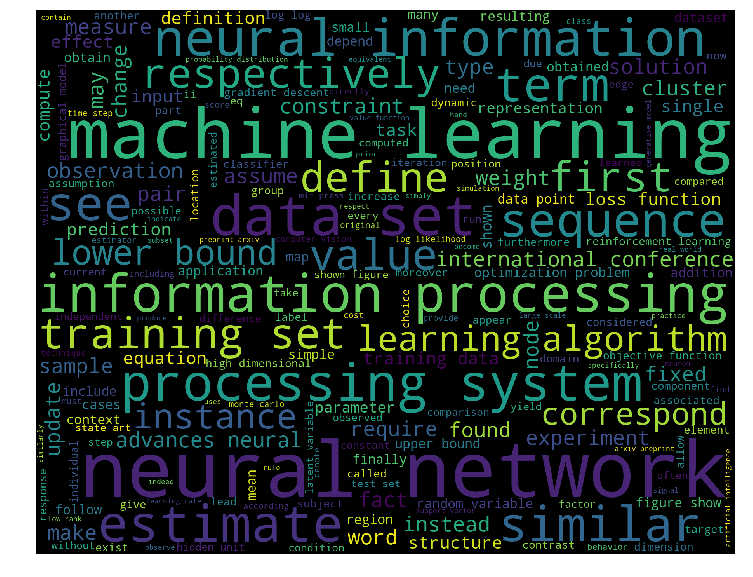

In [201]:
#Iteritively added stopwords to exclude the "uninteresting"
cloud_stopwords = STOPWORDS
cloud_stopwords.update(["this","that","thus","from","does","example","however","since","given",
                  "et","al", "hence", "therefore", "use", "used", "note", "corresponding", 
                  "setting", "well", "one", "form", "using", "second", "even", "known", "either",
                 "consider", "particular", "general", "represent", "case", "output", "defined",
                 "rather", "though", "although"])
wordcloud = WordCloud(
                      stopwords=cloud_stopwords,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(completestring)
plt.figure( figsize =(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud_titles')

In [202]:
papers.columns

Index(['year', 'title', 'abstract', 'paper_text', 'title_processed'], dtype='object')

# Preprocess text

In [ ]:
# Use stopwords from "nltk.corpus" and add some of my own
stop_words = set(stopwords.words('english')) # sets are efficient
stop_words.update(["this", "that", "thus", "from", "does", "example", "however", "since", "given", 
                    "et", "al", "hence", "therefore", "use", "used", "note", "corresponding", 
                    "setting", "well", "one", "form", "using", "second", "even", "known", "either",
                    "consider", "particular", "general", "represent", "case", "output", "defined",
                    "rather", "though", "although", "set", "problem", "function", "figure", "given",
                    "results", "number", "time", "data", "results", "given", "information", "different",
                    "models", "method"])

In [228]:
len(stop_words)

223

In [229]:
start_time = timeit.default_timer()

# This function removes process the stopwords.
def rem_stopwords(txt):
    words = txt.split()
    ret_word = words.copy()
    for w in words: 
        if w.lower() in stop_words:
            ret_word.remove(w)
    return (" ".join(ret_word))

papers['text_processed'] = papers['paper_text'].map(rem_stopwords)

elapsed = timeit.default_timer() - start_time
print(elapsed)

203.46603187199798


In [231]:
# For graph, needs to be string format
start_time = timeit.default_timer()

papers['text_string'] = [','.join(map(str, l)) for l in papers['text_processed']]
papers.head(2)

elapsed = timeit.default_timer() - start_time
print(elapsed)

9.799260888998106


In [237]:
print(papers.info())
papers.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 6 columns):
year               7241 non-null int64
title              7241 non-null object
abstract           7241 non-null object
paper_text         7241 non-null object
title_processed    7241 non-null object
text_processed     7241 non-null object
dtypes: int64(1), object(5)
memory usage: 339.5+ KB
None


,year,title,abstract,paper_text,title_processed,text_processed
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,self-organization of associative database and ...,767 SELF-ORGANIZATION ASSOCIATIVE DATABASE APP...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,a mean field theory of layer iv of visual cort...,683 MEAN FIELD THEORY LAYER IV VISUAL CORTEX A...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance by the associative long-ter...,394 STORING COVARIANCE ASSOCIATIVE LONG?TERM P...


In [220]:
# Graphing of Main Texts
# function to print 15 most common words
start_time = timeit.default_timer()

plt.style.use('ggplot')
#plt.style.use('seaborn')
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(figsize=(18,12))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=45, fontsize=14) 
    plt.xlabel('Words',fontsize=18)
    plt.ylabel('Count',fontsize=18)
    plt.title('Fifteen Most Common Words in Main Texts', fontsize=25)
#    fig.set_size_inches(18.5, 10.5)
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer_2 = CountVectorizer(stop_words='english')

# Fit and transform the processed texts
count_data_2 = count_vectorizer_2.fit_transform(papers.text_string)

# Visualise the 10 most common words
plot_20_most_common_words(count_data_2, count_vectorizer_2)

elapsed = timeit.default_timer() - start_time
print(elapsed)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [236]:
papers.drop(columns=['text_string'], inplace=True)

In [214]:
#Print the text of the first 3 rows 
print(papers['paper_text'].head(3))
start_time = timeit.default_timer()

# Remove punctuation    
papers['text_processed'] = papers['text_processed'].map(lambda text: [w for w in word_tokenize(text.lower()) 
                  if w.isalpha()])
elapsed = timeit.default_timer() - start_time
print(elapsed)

# # Print the processed titles of the first rows 
papers['text_processed'][0:3]

0    767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1    683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2    394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
Name: paper_text, dtype: object


KeyboardInterrupt: 

In [62]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Print the head of df
print(papers.head())

# # Create a series to store the labels: y
# y = df.label

# # Create training and test sets
# X_train, X_test, y_train, y_test = train_test_split(df['text'], 
#                                                     y,
#                                                     test_size=0.33, 
#                                                     random_state=53)

# # Initialize a CountVectorizer object: count_vectorizer
# count_vectorizer = CountVectorizer(stop_words='english')

# # Transform the training data using only the 'text' column values: count_train 
# count_train = count_vectorizer.fit_transform(X_train)

# # Transform the test data using only the 'text' column values: count_test 
# count_test = count_vectorizer.transform(X_test)

# # Print the first 10 features of the count_vectorizer
# print(count_vectorizer.get_feature_names()[:10])

   year                                              title          abstract  \
0  1987  Self-Organization of Associative Database and ...  Abstract Missing   
1  1987  A Mean Field Theory of Layer IV of Visual Cort...  Abstract Missing   
2  1988  Storing Covariance by the Associative Long-Ter...  Abstract Missing   
3  1994  Bayesian Query Construction for Neural Network...  Abstract Missing   
4  1994  Neural Network Ensembles, Cross Validation, an...  Abstract Missing   

                                          paper_text  \
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...   
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...   
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...   
3  Bayesian Query Construction for Neural\nNetwor...   
4  Neural Network Ensembles, Cross\nValidation, a...   

                                     title_processed  
0  self-organization of associative database and ...  
1  a mean field theory of layer iv of visual cort...  
2  storing covari